In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r'C:\Users\hi2ga\Downloads\archive\Ecommerce Customers')
df.rename(columns={'Avatar': 'Avatar(online names)','Time on App':'Time on App in mins','Time on website':'Time on website in mins','Length of Membership':'Length of Membership in months','Yearly Amount Spent':'Yearly Amount Spent in $','Avg. Session Length':'Avg. Session Length in mins'}, inplace=True)
df.head()

,Email,Address,Avatar(online names),Avg. Session Length in mins,Time on App in mins,Time on Website,Length of Membership in months,Yearly Amount Spent in $
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Email                           500 non-null    object 
 1   Address                         500 non-null    object 
 2   Avatar(online names)            500 non-null    object 
 3   Avg. Session Length in mins     500 non-null    float64
 4   Time on App in mins             500 non-null    float64
 5   Time on Website                 500 non-null    float64
 6   Length of Membership in months  500 non-null    float64
 7   Yearly Amount Spent in $        500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()


,Avg. Session Length in mins,Time on App in mins,Time on Website,Length of Membership in months,Yearly Amount Spent in $
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


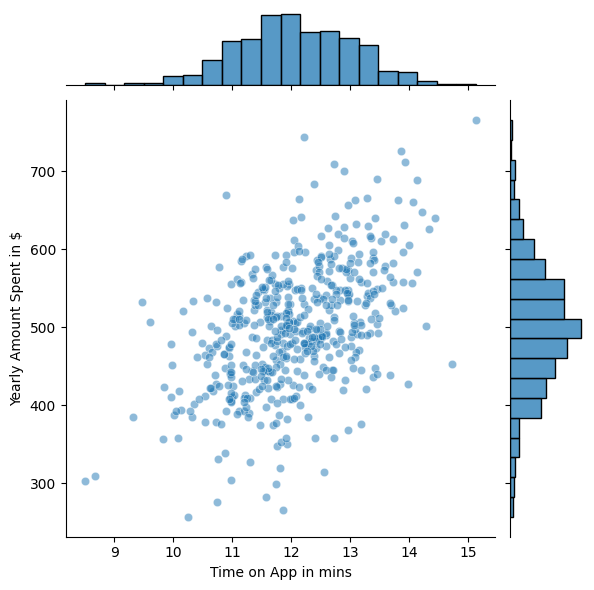

In [8]:
sns.jointplot(x="Time on App in mins",y="Yearly Amount Spent in $",data=df,alpha=0.5)

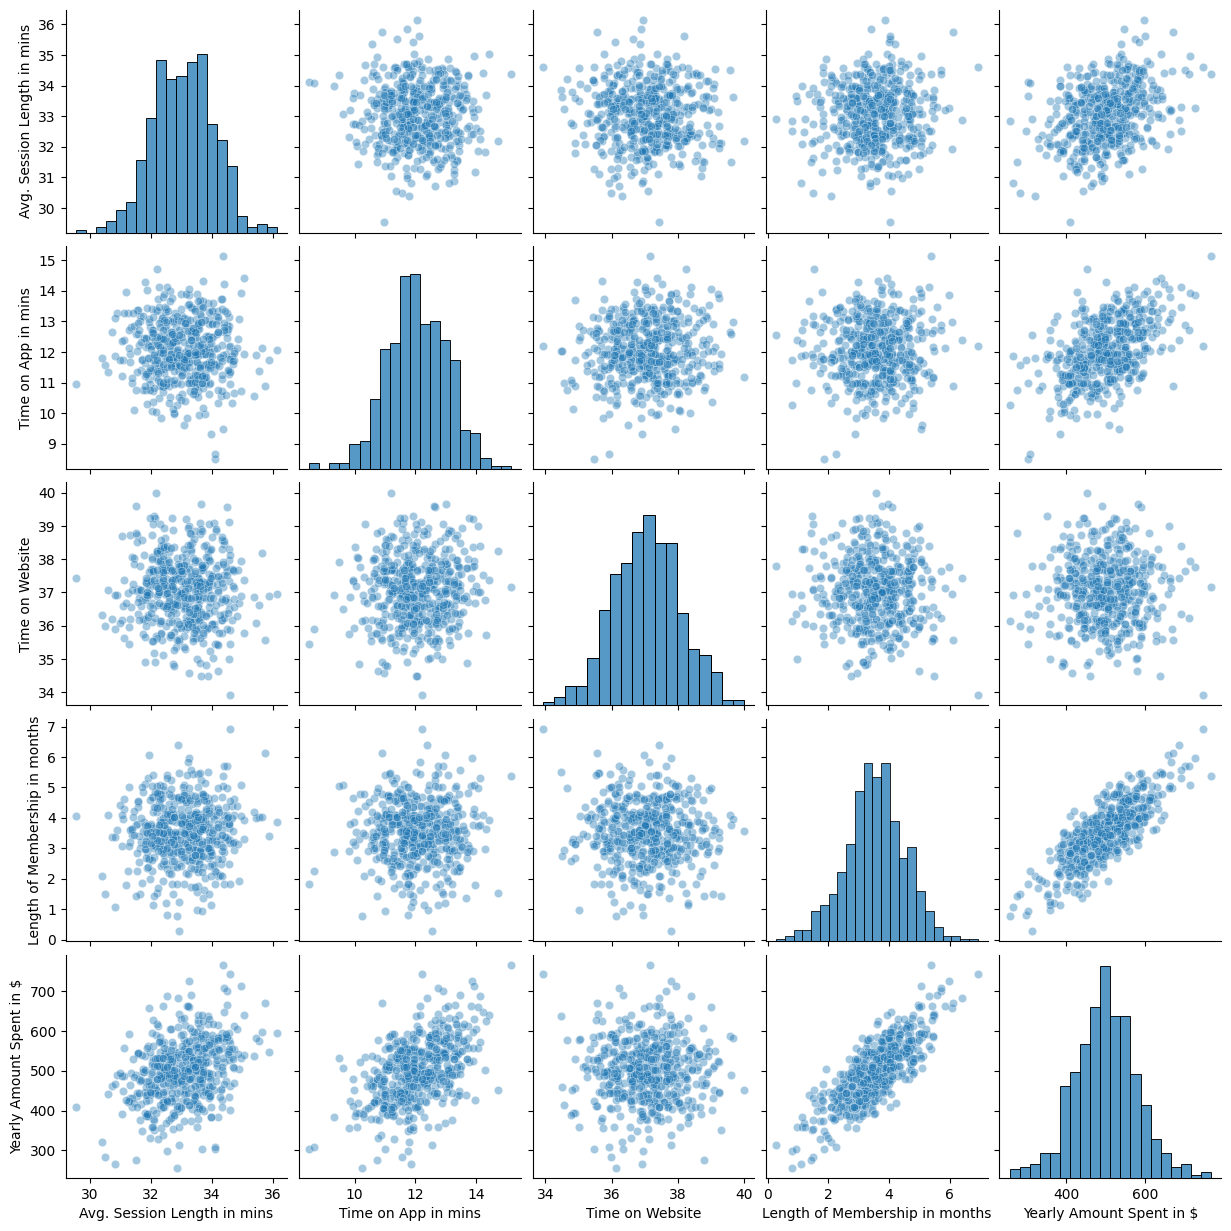

In [9]:
sns.pairplot(df, kind="scatter",plot_kws={"alpha": 0.4})

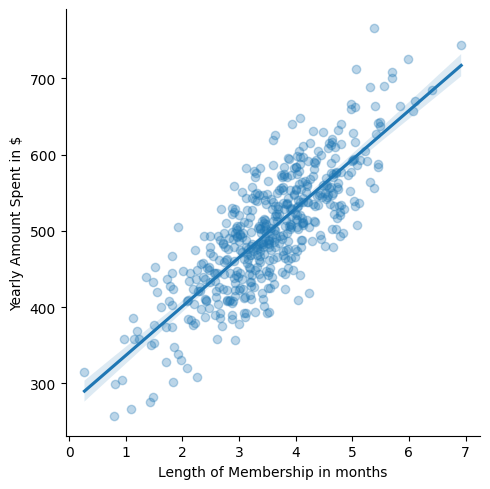

In [10]:
sns.lmplot(x='Length of Membership in months',y='Yearly Amount Spent in $',data=df,scatter_kws={'alpha':0.3})

In [11]:
from sklearn.model_selection import train_test_split

In [24]:
#creating sub dataframes for the info we need
X = df[['Avg. Session Length in mins','Time on App in mins','Time on Website','Length of Membership in months']]
y = df[["Yearly Amount Spent in $"]]

In [25]:
#X in upper case as it contains various rows and columns as a matrix 
#y in lower case as it contains on ly columns not rows
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [26]:
X_train

,Avg. Session Length in mins,Time on App in mins,Time on Website,Length of Membership in months
5,33.871038,12.026925,34.476878,5.493507
116,33.925795,12.011022,36.701052,2.753424
45,34.555768,12.170525,39.131097,3.663105
16,32.125387,11.733862,34.894093,3.136133
462,33.503810,11.233415,37.211153,2.320550
...,...,...,...,...
106,32.291756,12.190474,36.152462,3.781823
270,34.006489,12.956277,38.655095,3.275734
348,31.812483,10.886921,34.897828,3.128639
435,32.259973,14.132893,37.023479,3.762070


In [27]:
y_train


,Yearly Amount Spent in $
5,637.102448
116,479.231093
45,549.860590
16,457.847696
462,397.420584
...,...
106,494.551861
270,540.995739
348,392.810345
435,571.216005


In [29]:
from sklearn.linear_model import LinearRegression

In [55]:
lm=LinearRegression()

In [56]:
lm.fit(X_train,y_train)

LinearRegression()

In [58]:
coeff=lm.coef_.reshape(4,1)

In [59]:
cdf=pd.DataFrame(coeff,columns=['coef'],index=X.columns)
cdf

,coef
Avg. Session Length in mins,25.724256
Time on App in mins,38.597135
Time on Website,0.459148
Length of Membership in months,61.674732


In [86]:
predictions = lm.predict(X_test)
predictions=predictions.ravel()


Text(0, 0.5, 'evaluation of our lm model')

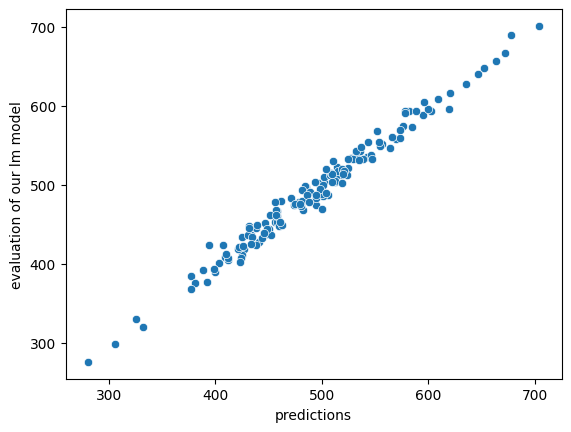

In [85]:

sns.scatterplot(x=predictions,y=y_test.ravel())
plt.xlabel("predictions")
plt.ylabel("evaluation of our lm model")

In [83]:
print(y_test.shape)

(150, 1)


In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

In [93]:
print("Mean Absolute Error: ", mean_absolute_error(predictions,y_test))
print("Mean Squared Error: ", mean_squared_error(predictions,y_test))
print("Root Mean Squared Error" ,math.sqrt(mean_squared_error(y_test,predictions)))

Mean Absolute Error:  8.426091641432116
Mean Squared Error:  103.91554136503333
Root Mean Squared Error 10.193897260863155


In [94]:
residuals = y_test - predictions

In [98]:
residuals

array([[  -2.63679547, -141.54442767,  -26.03278136, ..., -118.15488701,
        -118.99841673, -134.10541515],
       [ 131.10725741,   -7.80037479,  107.71127152, ...,   15.58916587,
          14.74563615,   -0.36136227],
       [  14.93281141, -123.97482079,   -8.46317449, ..., -100.58528013,
        -101.42880986, -116.53580828],
       ...,
       [  98.73985461,  -40.16777758,   75.34386872, ...,  -16.77823692,
         -17.62176665,  -32.72876507],
       [ 110.33988716,  -28.56774504,   86.94390127, ...,   -5.17820438,
          -6.0217341 ,  -21.12873252],
       [ 127.09678797,  -11.81084423,  103.70080207, ...,   11.57869643,
          10.7351667 ,   -4.37183172]])

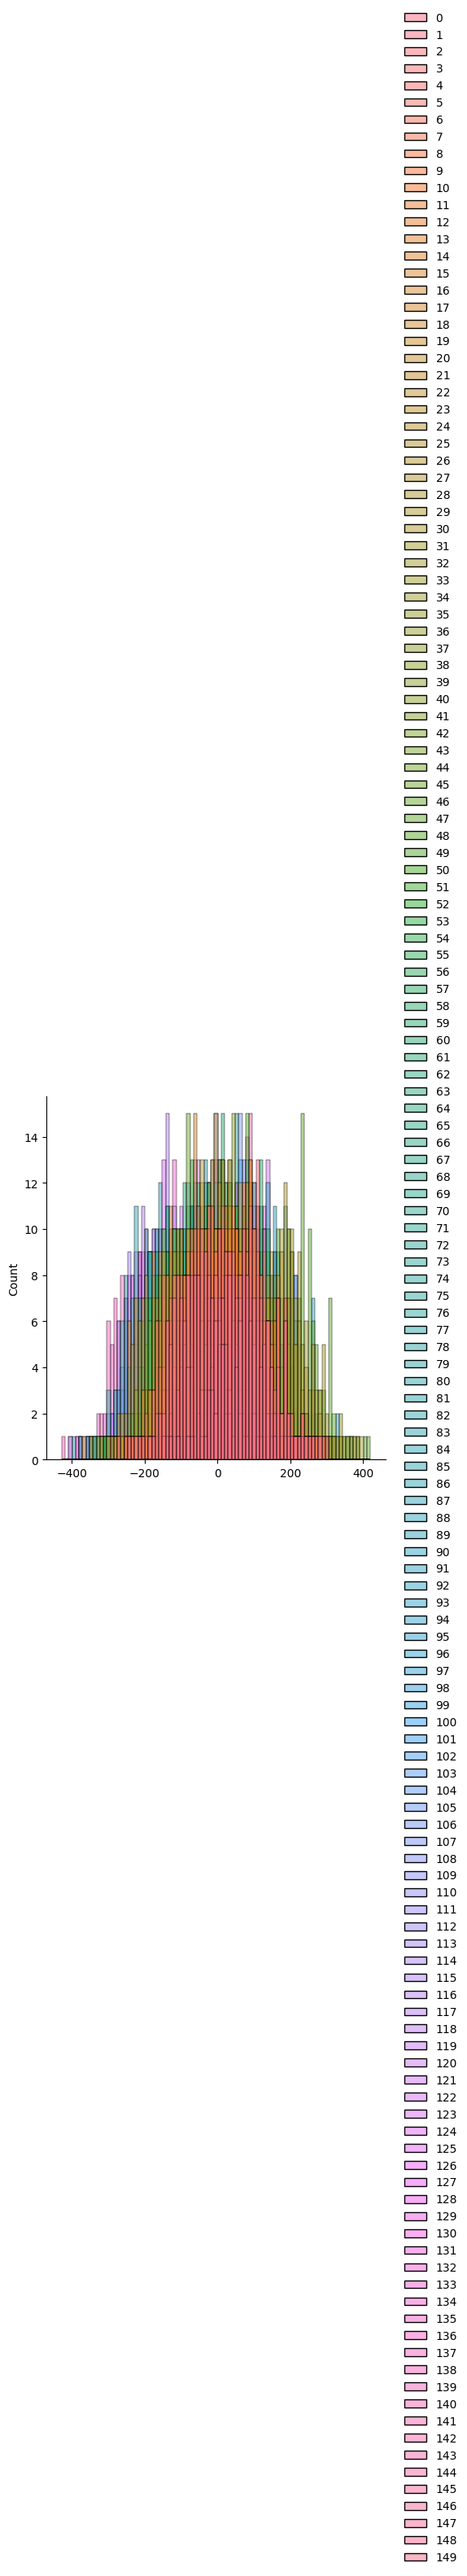

In [99]:
sns.displot(residuals)